<a href="https://colab.research.google.com/github/dogukartal/IBM_AI_Labs/blob/main/Introduction%20to%20Neural%20Networks%20and%20PyTorch/Final%20Projects/Final_Project_League_of_Legends_Match_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project: League of Legends Match Predictor


In [9]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Read data
data = pd.read_csv("/content/league_of_legends_data_large.csv")
data.head()

# Split data into features and target
X = data.drop('win', axis=1)
y = data['win']

# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()
# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)
# Transform the test data using the same scaler
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train)
X_test = torch.tensor(X_test)
y_train = torch.tensor(y_train.values)
y_test = torch.tensor(y_test.values)

In [31]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.linear(x)
        out = self.sigmoid(out)
        return out

input_dim = X_train.shape[1]
model = LogisticRegressionModel(input_dim)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [32]:
# Number of epochs
num_epochs = 1000

# Training loop
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train.float())
    loss = criterion(outputs.squeeze(), y_train.float())
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Model evaluation
model.eval()
with torch.no_grad():
    train_outputs = model(X_train.float())
    test_outputs = model(X_test.float())

    train_predicted = (train_outputs > 0.5).float()
    test_predicted = (test_outputs > 0.5).float()

    train_accuracy = (train_predicted.squeeze() == y_train.float()).sum().item() / len(y_train)
    test_accuracy = (test_predicted.squeeze() == y_test.float()).sum().item() / len(y_test)

print(f'Training Accuracy: {train_accuracy:}')
print(f'Testing Accuracy: {test_accuracy:}')

Epoch [100/1000], Loss: 0.7285
Epoch [200/1000], Loss: 0.7124
Epoch [300/1000], Loss: 0.7021
Epoch [400/1000], Loss: 0.6957
Epoch [500/1000], Loss: 0.6917
Epoch [600/1000], Loss: 0.6892
Epoch [700/1000], Loss: 0.6877
Epoch [800/1000], Loss: 0.6868
Epoch [900/1000], Loss: 0.6862
Epoch [1000/1000], Loss: 0.6858
Training Accuracy: 0.53625
Testing Accuracy: 0.515


In [34]:
model = LogisticRegressionModel(input_dim)
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train.float())
    loss = criterion(outputs.squeeze(), y_train.float())
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

model.eval()
with torch.no_grad():
    y_pred_train = model(X_train.float())
    y_pred_test = model(X_test.float())
    y_pred_train = (y_pred_train > 0.5).float()
    y_pred_test = (y_pred_test > 0.5).float()
    train_accuracy = (y_pred_train.squeeze() == y_train.float()).sum().item() / len(y_train)
    test_accuracy = (y_pred_test.squeeze() == y_test.float()).sum().item() / len(y_test)

print(f'Training Accuracy: {train_accuracy:}')
print(f'Testing Accuracy: {test_accuracy:}')

Epoch [100/1000], Loss: 0.7259
Epoch [200/1000], Loss: 0.7097
Epoch [300/1000], Loss: 0.6998
Epoch [400/1000], Loss: 0.6939
Epoch [500/1000], Loss: 0.6904
Epoch [600/1000], Loss: 0.6883
Epoch [700/1000], Loss: 0.6871
Epoch [800/1000], Loss: 0.6864
Epoch [900/1000], Loss: 0.6859
Epoch [1000/1000], Loss: 0.6857
Training Accuracy: 0.55
Testing Accuracy: 0.51


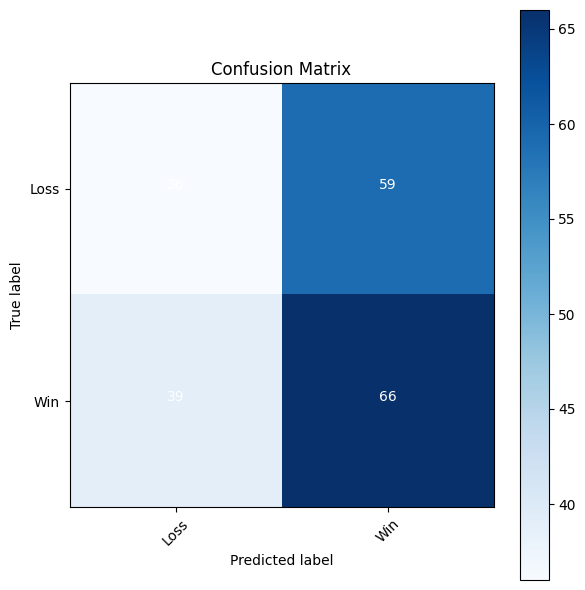

Classification Report:
               precision    recall  f1-score   support

        Loss       0.48      0.38      0.42        95
         Win       0.53      0.63      0.57       105

    accuracy                           0.51       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.51      0.51      0.50       200



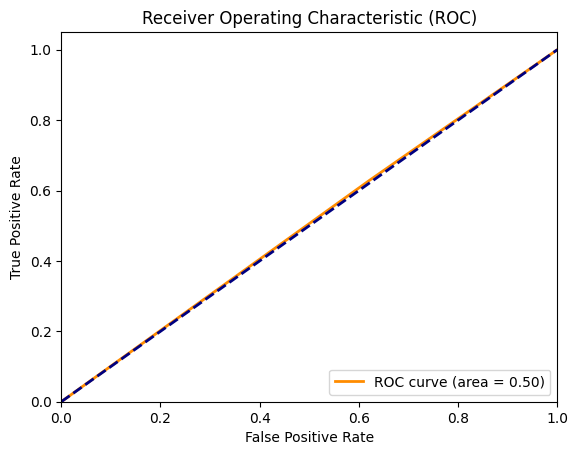

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import itertools

# Visualize the confusion matrix
y_pred_test_labels = (y_pred_test > 0.5).float()
cm = confusion_matrix(y_test, y_pred_test_labels)

plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = range(2)
plt.xticks(tick_marks, ['Loss', 'Win'], rotation=45)
plt.yticks(tick_marks, ['Loss', 'Win'])

thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred_test_labels, target_names=['Loss', 'Win']))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [38]:
import torch

# Save the model
torch.save(model.state_dict(), 'logistic_regression_model.pth')

# Load the model
loaded_model = LogisticRegressionModel(input_dim)
loaded_model.load_state_dict(torch.load('logistic_regression_model.pth'))

# Ensure the loaded model is in evaluation mode
loaded_model.eval()

# Evaluate the loaded model
with torch.no_grad():
    y_pred_test = loaded_model(X_test.float())
    y_pred_test = (y_pred_test > 0.5).float()
    test_accuracy = (y_pred_test.squeeze() == y_test.float()).sum().item() / len(y_test)

print(f'Testing Accuracy of the loaded model: {test_accuracy:}')

Testing Accuracy of the loaded model: 0.51


<ipython-input-38-470e3b62be73>:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load('logistic_regression_model.pth'))


In [39]:
learning_rates = [0.01, 0.05, 0.1]
num_epochs = 100

best_lr = None
best_accuracy = 0

for lr in learning_rates:
    model = LogisticRegressionModel(input_dim)
    optimizer = optim.SGD(model.parameters(), lr=lr)

    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train.float())
        loss = criterion(outputs.squeeze(), y_train.float())
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        y_pred_test = model(X_test.float())
        y_pred_test = (y_pred_test > 0.5).float()
        test_accuracy = (y_pred_test.squeeze() == y_test.float()).sum().item() / len(y_test)

    print(f"Learning Rate: {lr}, Test Accuracy: {test_accuracy}")

    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_lr = lr

print(f"\nBest Learning Rate: {best_lr}, Best Test Accuracy: {best_accuracy}")

Learning Rate: 0.01, Test Accuracy: 0.535
Learning Rate: 0.05, Test Accuracy: 0.48
Learning Rate: 0.1, Test Accuracy: 0.53

Best Learning Rate: 0.01, Best Test Accuracy: 0.535


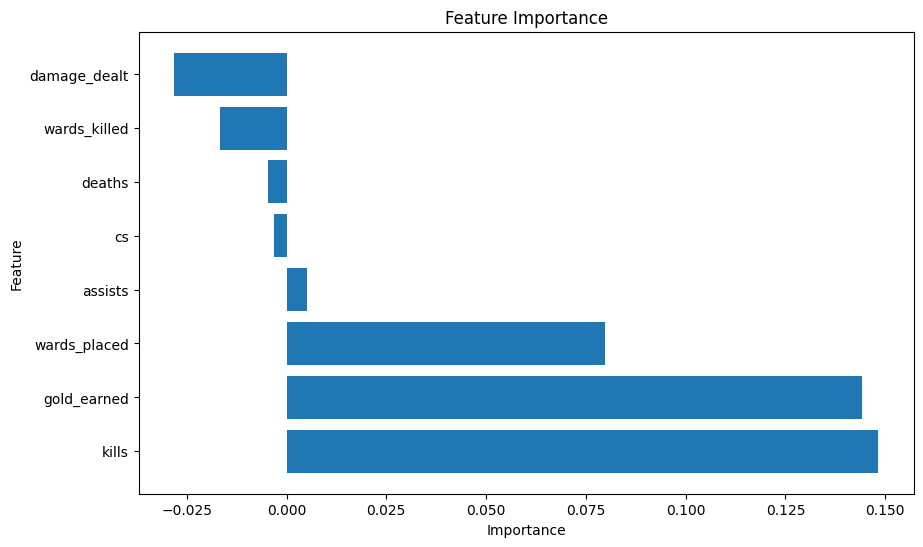

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the weights of the linear layer
weights = model.linear.weight.data.numpy().flatten()

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({'Feature': X.columns[0:8], 'Importance': weights})

# Sort the features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Visualize feature importance using a bar plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()